In [ ]:
!pip install astroquery

     |████████████████████████████████| 4.5 MB 3.8 MB/s 
     |████████████████████████████████| 832 kB 45.7 MB/s 
     |████████████████████████████████| 48 kB 2.7 MB/s 
     |████████████████████████████████| 4.0 MB 45.5 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import astropy.coordinates as apcrd
import astropy.units as u
# import astropy.time

from astroquery.gaia import Gaia
Gaia.MAIN_GAIA_TABLE = "gaiaedr3.gaia_source"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/filtered_dataset_sn02.csv', usecols=['date', 'counts', 'sun_zenith', 'moon_zenith', 'moon_azimuth', 'moon_elevation'])
df_raw["date"] = pd.to_datetime(df_raw['date'])
df_raw

,date,counts,sun_zenith,moon_zenith,moon_azimuth,moon_elevation
0,2017-04-21 02:50:54,1003,161.661,98.4510,340.097172,-71.930874
1,2017-04-21 02:51:01,1036,161.669,98.4740,340.180433,-71.938728
2,2017-04-21 02:51:05,1010,161.674,98.4880,340.228041,-71.943202
3,2017-04-21 02:51:06,1028,161.675,98.4910,340.239946,-71.944318
4,2017-04-21 02:51:11,1034,161.680,98.5080,340.299493,-71.949892
...,...,...,...,...,...,...
419291,2019-05-01 02:59:56,31161,142.230,98.8009,305.679135,-52.606840
419292,2019-05-01 02:59:57,30837,142.233,98.8042,305.683875,-52.609586
419293,2019-05-01 02:59:58,30942,142.236,98.8074,305.688615,-52.612331
419294,2019-05-01 02:59:59,31092,142.238,98.8107,305.693355,-52.615076


In [ ]:
def counts_to_magnitude(counts):
  return -2.5 * np.log10(counts) + 20.08


magnitude = []
for index, row in df_raw.iterrows():
  magnitude.append(counts_to_magnitude(row['counts']))
# magnitude

In [ ]:
df_raw['magnitude'] = magnitude
df_raw

,date,counts,sun_zenith,moon_zenith,moon_azimuth,moon_elevation,magnitude
0,2017-04-21 02:50:54,1003,161.661,98.4510,340.097172,-71.930874,12.576748
1,2017-04-21 02:51:01,1036,161.669,98.4740,340.180433,-71.938728,12.541601
2,2017-04-21 02:51:05,1010,161.674,98.4880,340.228041,-71.943202,12.569197
3,2017-04-21 02:51:06,1028,161.675,98.4910,340.239946,-71.944318,12.550017
4,2017-04-21 02:51:11,1034,161.680,98.5080,340.299493,-71.949892,12.543699
...,...,...,...,...,...,...,...
419291,2019-05-01 02:59:56,31161,142.230,98.8009,305.679135,-52.606840,8.845972
419292,2019-05-01 02:59:57,30837,142.233,98.8042,305.683875,-52.609586,8.857320
419293,2019-05-01 02:59:58,30942,142.236,98.8074,305.688615,-52.612331,8.853629
419294,2019-05-01 02:59:59,31092,142.238,98.8107,305.693355,-52.615076,8.848378


In [ ]:
detectors_df = pd.read_csv(
    'http://michalvrabel.sk/tsf/svd/amon/data/detectors.csv', 
#     'data/detectors.csv'
    sep=r'\s+', index_col='name'
)
detectors_df

,longitude,latitude,altitude,location,timezone
name,,,,,
SN01,22.273810,48.934890,2643.0,Lomnicky stit,Etc/GMT-1
SN02,-115.466950,31.045357,2790.0,Mexico,Etc/GMT+8
SN03,-17.894000,28.763889,2163.0,"La Palma, Canary Islands",Etc/GMT
SN04,18.121744,59.329224,27.6,Stockholm,Etc/GMT-1


In [ ]:
sn02_props = detectors_df.loc['SN02']
sn02_props

longitude   -115.46695
latitude     31.045357
altitude        2790.0
location        Mexico
timezone     Etc/GMT+8
Name: SN02, dtype: object

In [ ]:
sn02_earth_location = apcrd.EarthLocation.from_geodetic(
    sn02_props['longitude'], sn02_props['latitude'], height=sn02_props['altitude']*u.m)
sn02_earth_location

<EarthLocation (-2352817.01879659, -4940114.97790192, 3271641.79776094) m>

In [ ]:
!pip install pvlib

     |████████████████████████████████| 27.6 MB 1.5 MB/s 


In [ ]:
import ephem

from astropy import coordinates as coord
from astropy.time import Time
from astropy import units as u
from datetime import datetime as dt

# def HA(time):
#     obs = ephem.Observer()

#     # time = dt.strptime('2013/6/21' +' ' + '13:00:00', '%Y/%m/%d %H:%M:%S')
#     obs.date = time
#     obs.lon = sn02_props['longitude']
#     obs.lat = sn02_props['latitude']

#     obs.elevation = sn02_props['altitude']

#     sun = ephem.Sun()
#     sun.compute(obs)
#     ra = sun.g_ra

#     c= coord.ICRSCoordinates(ra=ra, dec = sun.dec, unit=(u.radian, u.radian))

#     t = Time('2013-06-21 13:00:00', format = 'iso', scale = 'utc')

#     t.lat = 43.66

#     t.lon =-79.4
        
#     ha = coord.angles.RA.hour_angle(c.ra,t)
#     print(coord.angles.RA)
#     return ha

# HA(df_raw.iloc[1]['date'])

In [ ]:
import ephem
import pvlib as pvl
from astropy.time import Time
from astropy.coordinates import Angle

lat = sn02_props['latitude']
lon = sn02_props['longitude']

# for index, row in df_raw.iterrows():
#   gatech = ephem.Observer()
#   gatech.lon, gatech.lat = sn02_props['longitude'], sn02_props['latitude']
#   gatech.date = row['date']
#   gatech.sidereal_time()
#   print(gatech.sidereal_time())
#   # time_index = pd.DatetimeIndex(row['date'])
#   # print(time_index)
#   # hour_angle = pvl.solarposition.hour_angle(time_index, lon, lat*60)
gatech = ephem.Observer()
gatech.lon, gatech.lat = sn02_props['longitude'], sn02_props['latitude']
gatech.date = df_raw.iloc[300000]['date']
display(gatech.sidereal_time())
print(gatech.sidereal_time())
test = Angle(gatech.sidereal_time(), unit=u.deg)
# type(gatech.sidereal_time())
test 

2.1015323897981677

8:01:38.14


<Angle 2.10153239 deg>

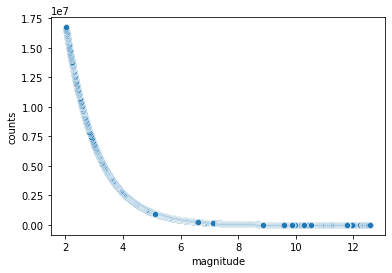

In [ ]:
ax = sns.scatterplot(data=df_raw, x=df_raw['magnitude'], y=df_raw['counts'])

In [ ]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [ ]:
# for x in range(12):
#   df_raw.groupby(df_raw["date"].dt.year)
#   sns.scatterplot(data=, x="counts", y='date')
# df_raw.groupby(df_raw["date"].dt.month).plot(kind="bar", figsize=(14,8))

[]

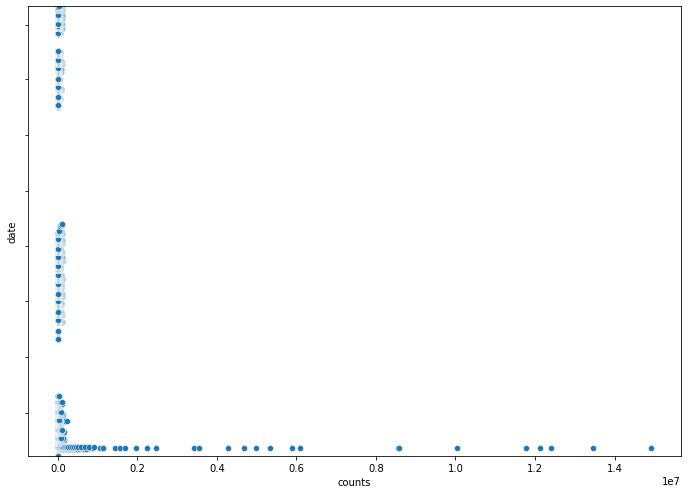

In [ ]:
ax = sns.scatterplot(data=df_raw[::50], x="counts", y='date')
ax.set_ylim(df_raw['date'].min(), df_raw['date'].max())
ax.set_yticklabels([])

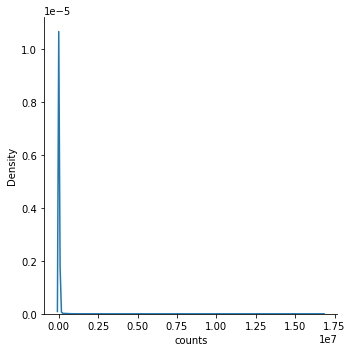

In [ ]:
sns.displot(x="counts", data=df_raw[::], kind="kde")

In [ ]:
coord = apcrd.SkyCoord(l=280, b=-90, unit=(u.degree, u.degree), frame='galactic')
width = u.Quantity(1, u.deg)
height = u.Quantity(1, u.deg)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)
r

INFO: Query finished. [astroquery.utils.tap.core]


dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,deg,deg,deg,deg
float64,int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float64,float64,float64,float64
0.00633627330099945,1636042515805110273,Gaia EDR3 2342678027428708736,2342678027428708736,418330821,2016.0,12.853981318707632,0.3052636,-27.12422773809686,0.36970004,2.0074062547319755,0.42982167,4.6703234,14.885248,-5.732379051821368,0.43671697,-13.737192181301845,0.54869604,0.30602172,0.14429268,0.010876477,0.018251903,-0.13170719,0.14573921,0.4786769,0.092697345,-0.2487478,0.5263343,298,0,298,0,2.1017358,382.8905,0.98844826,1.5294976,95,False,--,1.1996342,0.08703407,-0.15398304,0.053786308,0.10774155,-0.07523777,-0.14039506,35,18,0.8732621,41,8,0,0.003790346,43.660137,0,0,1.0870452,0.29773864,0.27569577,0.14387643,0.39871466,-44.040443,-35.535538,-58.916172,13.6984415,False,328,214.28911056350597,0.8059162,265.89502,19.859867,36,47.31436709188795,4.953082,9.55251,21.15106,38,284.03849996721186,7.257048,39.139675,18.614452,0,0,0,0,0,1.5462888,2.5366077,1.291193,1.2454147,--,--,0,--,--,--,72.34750430902375,-89.99366530605397,0.020263433678928452,-29.80565921959304
0.01531075629093729,1636042515805110273,Gaia EDR3 2342678061789279360,2342678061789279360,667327928,2016.0,12.86791115379333,19.32979

In [ ]:
print(len(r))
r.colnames

50


['dist',
 'solution_id',
 'DESIGNATION',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pm',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'nu_eff_used_in_astrometry',
 'pseudocolour',
 'pseudocolour_error',
 'ra_pseudocolour_corr',
 'dec_pseudocolour_corr',
 'parallax_pseudocolour_corr',
 'pmra_pseudocolour_corr',
 'pmdec_pseudocolour_corr',
 'astrometric_matched_transits',
 'visibility_periods_used',
 'astrometric_si

In [ ]:
r['phot_g_mean_mag']

19.859867
21.99509
21.064777
20.9856
19.711882
21.111763
20.042585
20.682951
21.22194
19.105337
17.72251


In [ ]:
r['phot_rp_mean_mag']

18.614452
18.27887
19.850042
19.955885
19.408245
20.125896
18.85148
19.463882
20.089064
18.085451
16.714622


In [ ]:
r['phot_bp_mean_mag']
phot_bp_mean_mag = [float(x) for x in r['phot_bp_mean_mag']]
dist = [float(x) for x in r['dist']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Warning: converting a masked element to nan.
  


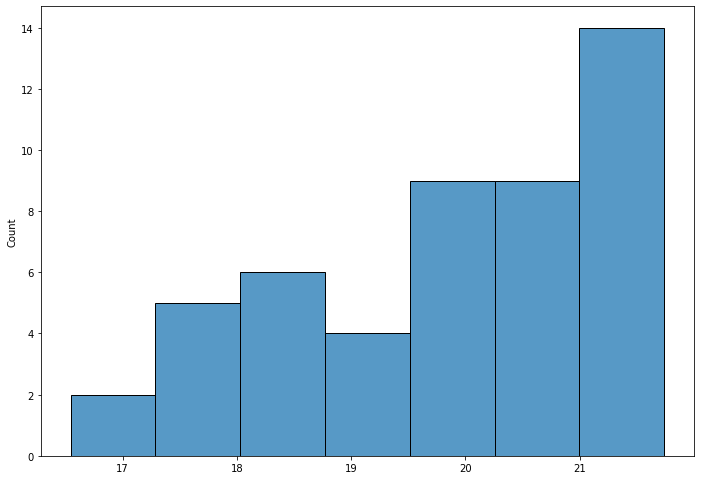

In [ ]:
sns.histplot(x=phot_bp_mean_mag, data=phot_bp_mean_mag)


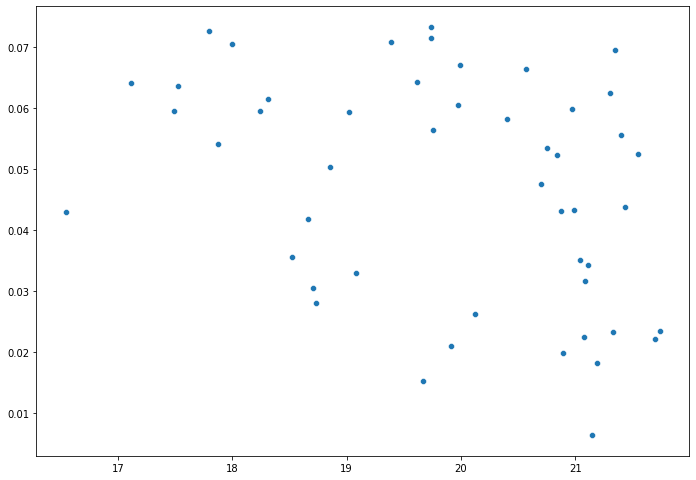

In [ ]:
ax = sns.scatterplot(data=phot_bp_mean_mag, x=phot_bp_mean_mag, y=dist)


In [ ]:
from astropy.coordinates import EarthLocation,SkyCoord
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import AltAz

In [ ]:
observing_location = EarthLocation(lat=sn02_props['latitude'], lon=sn02_props["longitude"], height=100*u.m)  
observing_time = Time('2017-02-05 20:12:18')
aa = AltAz(location=observing_location, obstime=observing_time)

coord = SkyCoord('4h42m', '-38d6m50.8s')
coord.transform_to(aa)

<SkyCoord (AltAz: obstime=2017-02-05 20:12:18.000, location=(-2351826.02745692, -4938034.23336422, 3270254.52045142) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (118.603387, -30.92353944)>

In [ ]:
aa

<AltAz Frame (obstime=2017-02-05 20:12:18.000, location=(-2351826.02745692, -4938034.23336422, 3270254.52045142) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

In [ ]:
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (70.5, -38.11411111)>

VISUALIZATION OF THE SKY USING ASTROPLAN LIBRARY

In [ ]:
def deg2HMS(ra='', dec='', round=False):
  RA, DEC, rs, ds = '', '', '', ''
  if dec:
    if str(dec)[0] == '-':
      ds, dec = '-', abs(dec)
    deg = int(dec)
    decM = abs(int((dec-deg)*60))
    if round:
      decS = int((abs((dec-deg)*60)-decM)*60)
    else:
      decS = (abs((dec-deg)*60)-decM)*60
    DEC = '{0}{1}h{2}m{3}s'.format(ds, deg, decM, decS)
  
  if ra:
    if str(ra)[0] == '-':
      rs, ra = '-', abs(ra)
    raH = int(ra/15)
    raM = int(((ra/15)-raH)*60)
    if round:
      raS = int(((((ra/15)-raH)*60)-raM)*60)
    else:
      raS = ((((ra/15)-raH)*60)-raM)*60
    RA = '{0}{1}h{2}m{3}s'.format(rs, raH, raM, raS)
  
  if ra and dec:
    return (RA, DEC)
  else:
    return RA or DEC

In [ ]:
Gaia.ROW_LIMIT = 10  # Ensure the default row limit.
# 360-47.58
coord = SkyCoord(ra=245, dec=31.045357, unit=(u.degree, u.degree), frame='icrs')
radius = u.Quantity(1.0, u.deg)
j = Gaia.cone_search_async(coord, radius)
r = j.get_results()
r

INFO: Query finished. [astroquery.utils.tap.core]


solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,dist
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,deg,deg,deg,deg,
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float64,float64,float64,float64,float64
1636042515805110273,Gaia EDR3 1319109049309845760,1319109049309845760,1218264915,2016.0,245.00713212377218,0.056937438,31.03523500245603,0.06785579,0.274310337187487,0.0853273,3.2148015,10.352167,-10.33437987133524,0.07524459,-0.6065997273224519,0.09959455,0.14196783,0.13882867,-0.032271896,-0.12694025,-0.028245041,-0.095008574,-0.06380577,-0.21152733,-0.16439465,0.27315897,513,0,507,6,0.7031775,545.67706,0.123970106,0.27472642,31,False,1.5514625,--,--,--,--,--,--,--,59,27,0.14423077,64,23,0,0.036012676,32.226665,0,0,1.0216051,0.22724494,0.26361373,0.018959194,0.19079605,-67.24088,-73.33135,41.283344,-5.97281,False,522,1308.6168211871352,1.1142377,1174.4503,17.895336,56,712.0048194596569,8.434352,84.41725,18.207335,53,867.977230875522,6.349277,136.7049,17.401625,0,3,0,1,0,1.207368,0.80570984,0.31199837,0.49371147,--,--,0,--,--,--,50.87574335590862,44.6709637887655,234.49531377872154,51.43868238482101,0.011825377403344987
1636042515805110273,Gaia EDR3 1319109079373621760,1319109079373621760,177221942,2016.0,245.01812360043206,0.7975896,31.04750314065935,0.9280277,3.498969684260001,1.2523848,2.7938

In [ ]:
epsilon_mag = 0.01
epsilon_dec = 0.01
dec = 31.045357

magnitude = round(df_raw['magnitude'][0], 6)
time = df_raw['date'][0]

sql_query = f'''
    SELECT top 50
    source_id, phot_g_mean_mag, ra, dec, ref_epoch
    FROM gaiaedr3.gaia_source
    WHERE dec BETWEEN {dec - epsilon_dec} AND {dec + epsilon_dec} AND phot_g_mean_mag BETWEEN {magnitude - epsilon_mag} AND {magnitude + epsilon_mag}
'''
job = Gaia.launch_job(sql_query)

print(f"Amon data sample datetime: {time}")
job.get_results()

Amon data sample datetime: 2017-04-21 02:50:54


source_id,phot_g_mean_mag,ra,dec,ref_epoch
,mag,deg,deg,yr
int64,float32,float64,float64,float64
180270123992396416,12.582242,78.72529037870983,31.04954081277259,2016.0
3446930882489460096,12.586636,79.84010522223856,31.049376308987718,2016.0
2033539333887218304,12.577336,298.4980076027817,31.037324828356862,2016.0
1858846830505777152,12.582143,313.4359829971959,31.046942410045123,2016.0
1885870013112694912,12.571683,347.11077406512607,31.037546488977885,2016.0
303559217511092480,12.581982,25.045010644722467,31.0527425449046,2016.0
2032235420511827584,12.568551,296.5643487233772,31.051811889466876,2016.0
2033107882971514752,12.573724,294.7177337383096,31.053113142905865,2016.0


In [ ]:
epsilon_mag = 0.01
epsilon_dec = 0.01
dec = 31.045357

stars_dict = {"star_id": [], "ra": [], "dec": []}
for index, row in df_raw.iloc[:20].iterrows():
  value = round(row['magnitude'], 6)

  sql_query = f'''
      SELECT top 1
      source_id, ra, dec
      FROM gaiaedr3.gaia_source
      WHERE dec BETWEEN {dec - epsilon_dec} AND {dec + epsilon_dec} AND phot_g_mean_mag BETWEEN {value - epsilon_mag} AND {value + epsilon_mag}
  '''
  job = Gaia.launch_job(sql_query)
  
  if len(job.get_results()) > 0:
    stars_dict["star_id"].append(str(job.get_results()[0]['source_id']))
    stars_dict["ra"].append(str(job.get_results()[0]['ra']))
    stars_dict["dec"].append(str(job.get_results()[0]['dec']))
  else:
    stars_dict["star_id"].append(None)
    stars_dict["star_id"].append(None)
    stars_dict["dec"].append(None)

pd_to_merge = pd.DataFrame(stars_dict)
merged_pd = pd.concat([df_raw, pd_to_merge], axis=1)

In [ ]:
merged_pd[['date', 'counts', 'magnitude', 'star_id', 'ra', 'dec']].head(20)

,date,counts,magnitude,star_id,ra,dec
0,2017-04-21 02:50:54,1003,12.576748,180270123992396416,78.72529037870983,31.04954081277259
1,2017-04-21 02:51:01,1036,12.541601,3446359102082051712,82.98257966284918,31.047868617900154
2,2017-04-21 02:51:05,1010,12.569197,756768427191834880,169.22789033988226,31.05436913840726
3,2017-04-21 02:51:06,1028,12.550017,3444678502856403200,85.54427712846392,31.049396226924824
4,2017-04-21 02:51:11,1034,12.543699,3446359102082051712,82.98257966284918,31.047868617900154
5,2017-04-21 02:51:12,1015,12.563835,756768427191834880,169.22789033988226,31.05436913840726
6,2017-04-21 02:51:13,1021,12.557436,756768427191834880,169.22789033988226,31.05436913840726
7,2017-04-21 02:51:14,1009,12.570272,756768427191834880,169.22789033988226,31.05436913840726
8,2017-04-21 02:51:16,1042,12.535331,2033528304400483328,299.07967806197007,31.050777510666077
9,2017-04-21 02:51:18,1021,12.557436,756768427191834880,169.22789033988226,31.05436913840726


In [ ]:
merged_pd.to_csv('amon_star_database.csv', index=False)  


In [ ]:
from astropy.coordinates import Angle
from astropy import units as u

stars = {}

for i, result in enumerate(r):
  ra = Angle(r[i]['ra'], unit=u.deg)
  ra = ra.to_string(unit=u.hour, precision=4)
  dec = Angle(r[i]['dec'], unit=u.deg)
  dec = dec.to_string(unit=u.hour, precision=4)
  print(ra, r[i]['ra'])
  print(dec, r[i]['dec'])
  stars[r[i]['source_id']] = SkyCoord(ra=ra, dec=dec, unit=(u.degree, u.degree), frame='icrs')

stars

16h20m01.7117s 245.00713212377218
2h04m08.4564s 31.03523500245603
16h20m04.3497s 245.01812360043206
2h04m11.4008s 31.04750314065935
16h19m59.2628s 244.99692837464877
2h04m15.0547s 31.06272793539333
16h20m05.3385s 245.02224383492376
2h04m10.7188s 31.044661476535666
16h19m54.4282s 244.97678435449728
2h04m12.2983s 31.051243048959055
16h20m05.9498s 245.02479082532898
2h04m10.2701s 31.04279225406426
16h19m53.8539s 244.97439119654553
2h04m11.0481s 31.046033824413332
16h20m06.3776s 245.02657318866085
2h04m11.0041s 31.04585041923982
16h20m04.9699s 245.02070786389606
2h04m14.3785s 31.059910508711873
16h20m06.2828s 245.0261784307987
2h04m08.8071s 31.036696384812423


{1319109010654083200: <SkyCoord (ICRS): (ra, dec) in deg
     (245.02617833, 31.03669625)>,
 1319109010654084864: <SkyCoord (ICRS): (ra, dec) in deg
     (245.02479083, 31.04279208)>,
 1319109010654086016: <SkyCoord (ICRS): (ra, dec) in deg
     (245.02657333, 31.04585042)>,
 1319109049309845760: <SkyCoord (ICRS): (ra, dec) in deg
     (245.00713208, 31.035235)>,
 1319109079373621760: <SkyCoord (ICRS): (ra, dec) in deg
     (245.01812375, 31.04750333)>,
 1319109083670004992: <SkyCoord (ICRS): (ra, dec) in deg
     (245.02224375, 31.04466167)>,
 1319109216812517376: <SkyCoord (ICRS): (ra, dec) in deg
     (244.97678417, 31.05124292)>,
 1319109221108538752: <SkyCoord (ICRS): (ra, dec) in deg
     (244.97439125, 31.04603375)>,
 1319109289828015360: <SkyCoord (ICRS): (ra, dec) in deg
     (244.99692833, 31.06272792)>,
 1319202915818241408: <SkyCoord (ICRS): (ra, dec) in deg
     (245.02070792, 31.05991042)>}

In [ ]:
!pip install astroplan
from astroplan.plots import plot_sky

     |████████████████████████████████| 134 kB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for astroplan: filename=astroplan-0.8-py3-none-any.whl size=83275 sha256=5b25bd96f4ca016ccc66b5da5b9a0202ef84b7d52783df2aa7a18021878bc98c
  Stored in directory: /root/.cache/pip/wheels/4f/c5/6d/20497dbabe23d89c54991f269460480788f7a6d15b4d1ae134
Successfully built astroplan


In [ ]:
import numpy as np
from astropy.coordinates import EarthLocation, SkyCoord
from astropy.time import Time
import astropy.units as u
import matplotlib.pyplot as plt
from pytz import timezone

from astroplan import Observer, FixedTarget
from astroplan.plots import plot_sky

In [ ]:
df_raw['date'].min()

Timestamp('2017-04-21 02:50:54')

<Observer: name='AMON detector',
    location (lon, lat, el)=(-115.46695 deg, 31.045356999999996 deg, 2790.000000001809 m),
    timezone=<DstTzInfo 'America/Mexico_City' LMT-1 day, 17:23:00 STD>>
1319109049309845760 <SkyCoord (ICRS): (ra, dec) in deg
    (245.00713208, 31.035235)>


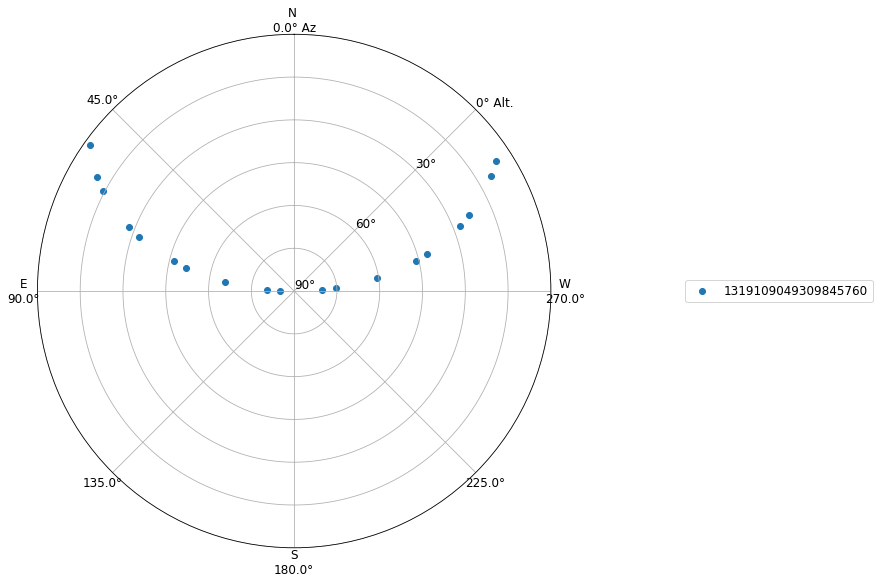

In [ ]:
amon = Observer(name='AMON detector',
                  location=sn02_earth_location,
                  timezone=timezone('America/Mexico_City'),
                  description="AMON detector in Mexico, Hawaii")
print(amon)
coordinates = SkyCoord('19h50m47.6s', '+08d52m12.0s', frame='icrs')
altair = FixedTarget(name='Altair', coord=coordinates)

coordinates = SkyCoord('18h36m56.5s', '+38d47m06.6s', frame='icrs')
vega = FixedTarget(name='Vega', coord=coordinates)

coordinates = SkyCoord('20h41m25.9s', '+45d16m49.3s', frame='icrs')
deneb = FixedTarget(name='Deneb', coord=coordinates)

# start = Time('2018-06-16 00:28:40.126')
# end = Time('2018-06-16 23:47:35.822')

start = df_raw['date'].min()
end = df_raw['date'].max()

time_window = start + (end - start) * np.linspace(0, 1, 30) 
# time_window = start + np.linspace(-4, 5, 10)*u.hour

altair_style = {'color': 'r'}
deneb_style = {'color': 'g'}

for star_id, star_coord in stars.items():
  target = FixedTarget(name=star_id, coord=star_coord)
  plot_sky(target, amon, time_window)
  print(star_id, star_coord)
  break

# plot_sky(altair, amon, time_window)

# plot_sky(vega, amon, time_window)

# plot_sky(deneb, amon, time_window)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))

plt.tight_layout()

plt.show()

In [ ]:
df_raw[:530]

,date,counts,sun_zenith,moon_zenith,moon_azimuth,moon_elevation,magnitude
0,2017-04-21 02:50:54,1003,161.661,98.451,340.097172,-71.930874,12.576748
1,2017-04-21 02:51:01,1036,161.669,98.474,340.180433,-71.938728,12.541601
2,2017-04-21 02:51:05,1010,161.674,98.488,340.228041,-71.943202,12.569197
3,2017-04-21 02:51:06,1028,161.675,98.491,340.239946,-71.944318,12.550017
4,2017-04-21 02:51:11,1034,161.680,98.508,340.299493,-71.949892,12.543699
...,...,...,...,...,...,...,...
525,2017-04-21 03:00:00,3579,162.173,100.281,346.776050,-72.442406,11.195596
526,2017-05-02 01:46:25,1032,16.810,83.705,220.017911,73.054228,12.545801
527,2017-05-02 01:46:26,1012,16.812,83.709,220.028729,73.051965,12.567049
528,2017-05-02 01:46:30,1034,16.821,83.722,220.071977,73.042907,12.543699


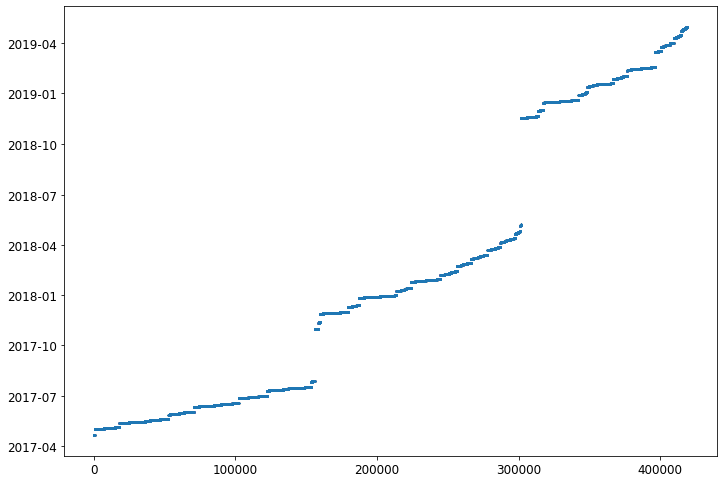

In [ ]:
df_raw['date'].plot(x=df_raw['date'], y=df_raw['counts'], linestyle='None', marker='.', markersize=1)

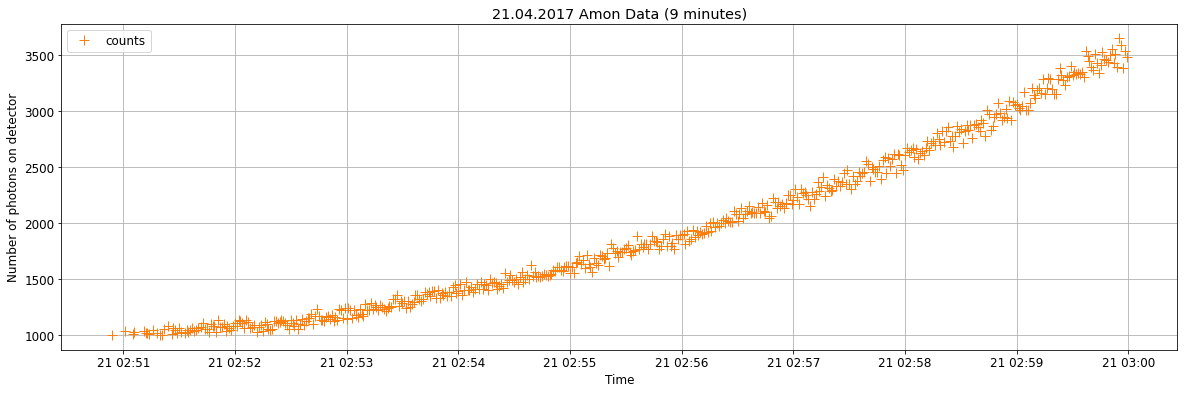

In [ ]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 6))

first_day_data = df_raw[:525]

# Specify how our lines should look
ax.plot(first_day_data.date, first_day_data.counts, color='tab:orange', label='counts', linestyle='None', marker='+', markersize=10)

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Number of photons on detector')
ax.set_title('21.04.2017 Amon Data (9 minutes)')
ax.grid(True)
ax.legend(loc='upper left');

In [ ]:
df_resampled = df_raw.resample('H', on='date').mean()
df_resampled

,counts,sun_zenith,moon_zenith,moon_azimuth,moon_elevation,magnitude
date,,,,,,
2017-04-21 02:00:00,1943.885714,161.944267,99.399318,343.523953,-72.213554,11.937593
2017-04-21 03:00:00,3579.000000,162.173000,100.281000,346.776050,-72.442406,11.195596
2017-04-21 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-21 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-21 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2019-04-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN


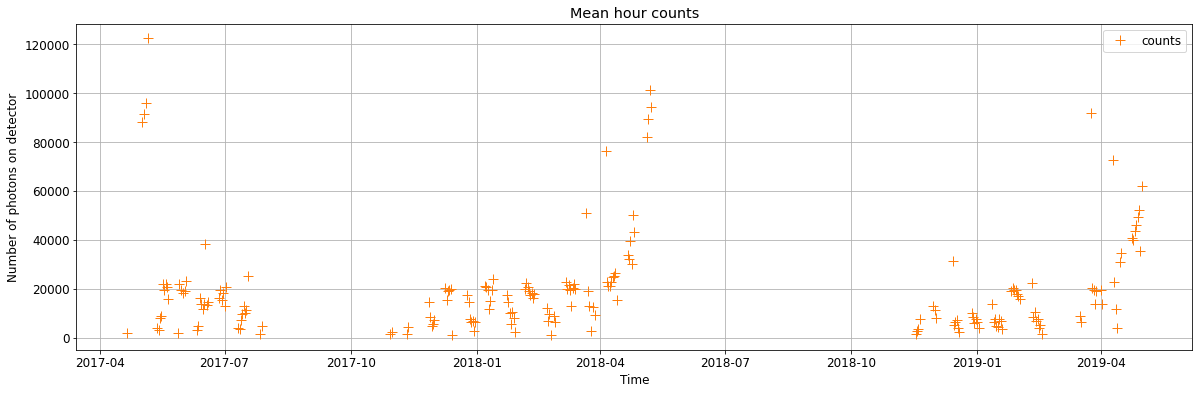

In [ ]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 6))

filtered_data = df_resampled[df_resampled['counts'] < 250000]
ax.plot(filtered_data.index, filtered_data.counts, color='tab:orange', label='counts', linestyle='None', marker='+', markersize=10)

ax.set_xlabel('Time')
ax.set_ylabel('Number of photons on detector')
ax.set_title('Mean hour counts')
ax.grid(True)
ax.legend(loc='upper right');

In [ ]:
df_resampled = df_raw.resample('D', on='date').mean()
df_resampled

,counts,sun_zenith,moon_zenith,moon_azimuth,moon_elevation,magnitude
date,,,,,,
2017-04-21,1946.994297,161.944702,99.400994,343.530136,-72.213990,11.936182
2017-04-22,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-23,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-24,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-25,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2019-04-27,46082.810662,164.442680,98.528424,45.280252,-74.685237,8.558634
2019-04-28,49275.691011,165.885176,98.393238,103.638882,-76.186246,8.486620
2019-04-29,52281.600815,160.304809,98.312678,329.092635,-70.618601,8.403871


In [ ]:
df_resampled.counts.idxmax()

Timestamp('2017-05-04 00:00:00', freq='D')

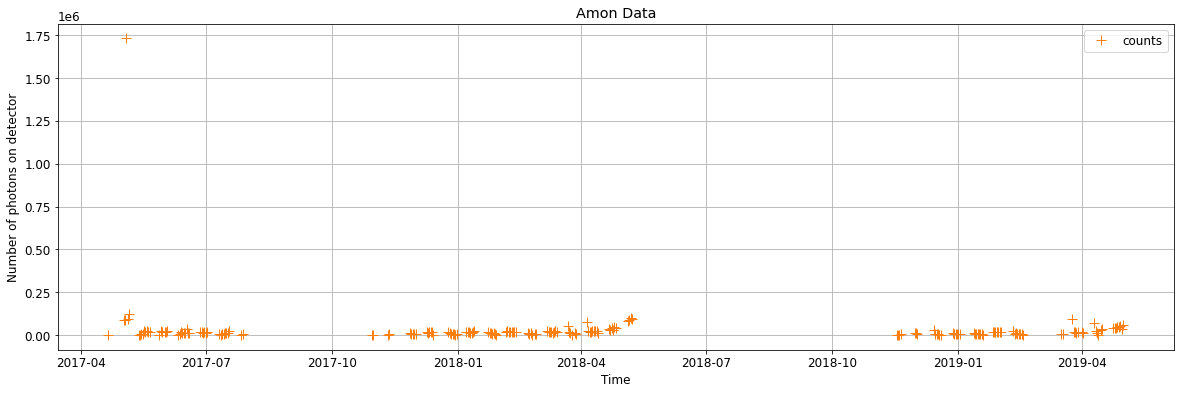

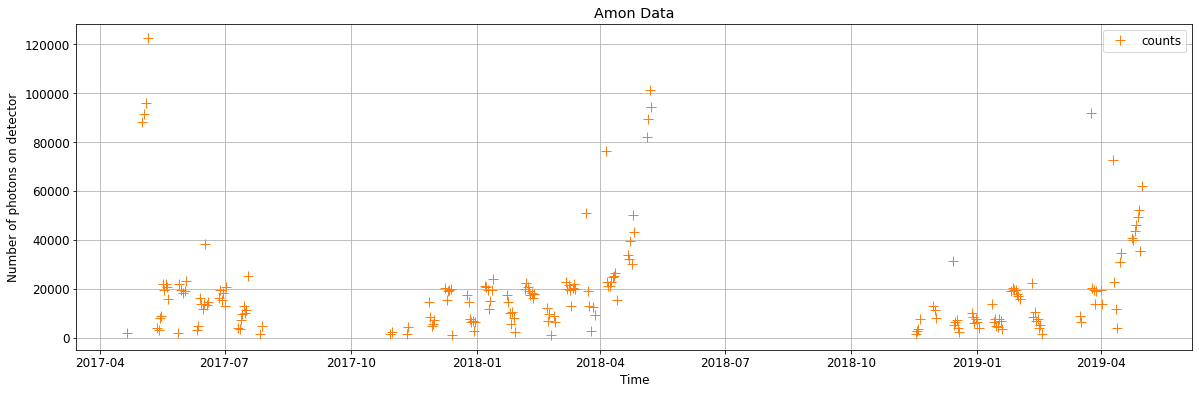

In [ ]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 6))
# print(plt.style.available)

ax.plot(df_resampled.index, df_resampled.counts, color='tab:orange', label='counts', linestyle='None', marker='+', markersize=10)

ax.set_xlabel('Time')
ax.set_ylabel('Number of photons on detector')
ax.set_title('Amon Data')
ax.grid(True)
ax.legend(loc='upper right');
filtered_data = df_resampled[df_resampled['counts'] < 250000]


fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(filtered_data.index, filtered_data.counts, color='tab:orange', label='counts', linestyle='None', marker='+', markersize=10)

ax.set_xlabel('Time')
ax.set_ylabel('Number of photons on detector')
ax.set_title('Amon Data')
ax.grid(True)
ax.legend(loc='upper right');

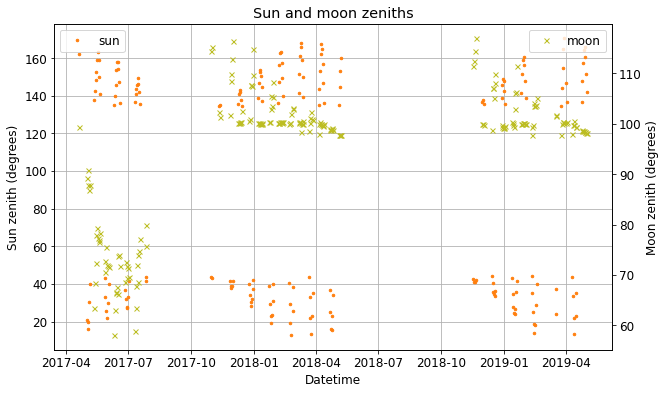

In [ ]:
from matplotlib.dates import DateFormatter, DayLocator

fig, ax = plt.subplots(figsize=(10, 6))
axb = ax.twinx()

# Same as above
ax.set_xlabel('Datetime')
ax.set_ylabel('Sun zenith (degrees)')
ax.set_title('Sun and moon zeniths')
ax.grid(True)

ax.plot(df_resampled.index, df_resampled.sun_zenith, color='tab:orange', label='sun', linestyle='None', marker='.', markersize=5)
ax.legend(loc='upper left')

axb.set_ylabel('Moon zenith (degrees)')
axb.plot(df_resampled.index, df_resampled.moon_zenith, color='tab:olive', label='moon', linestyle='None', marker='x', markersize=5)
axb.legend(loc='upper right')
# ax.xaxis.set_major_locator(DayLocator())
# ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

1319109049309845760 <SkyCoord (ICRS): (ra, dec) in deg
    (245.00713208, 31.035235)>


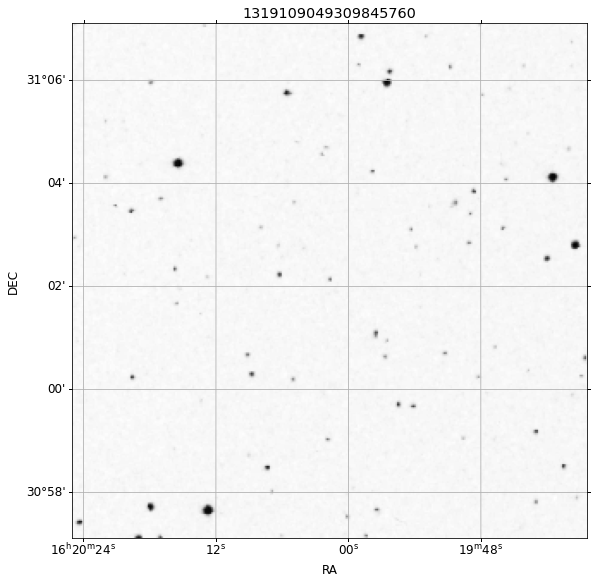

In [ ]:
from astroplan import FixedTarget
from astroplan.plots import plot_finder_image
import matplotlib.pyplot as plt

for star_id, star_coord in stars.items():
  target = FixedTarget(name=star_id, coord=star_coord)
  print(star_id, star_coord)
  break

ax, hdu = plot_finder_image(target)
plt.tight_layout()
plt.show()

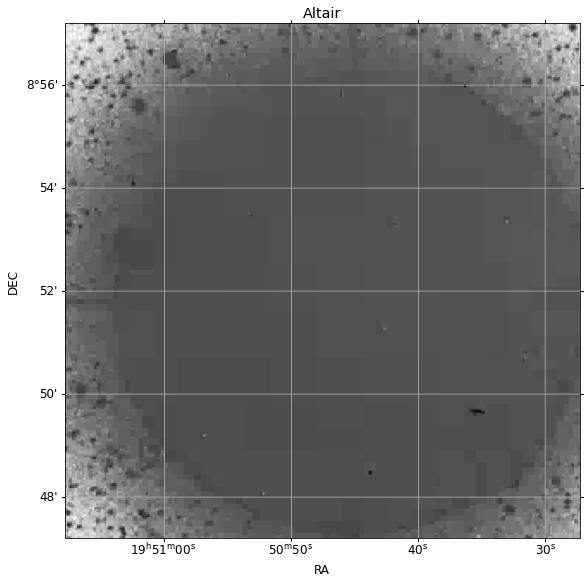

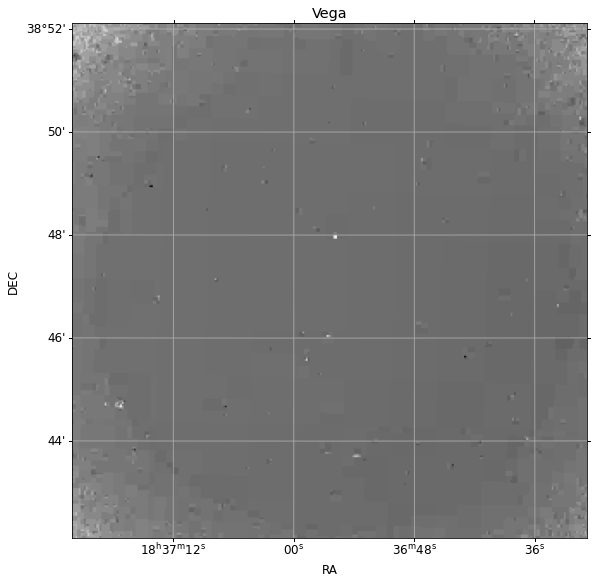

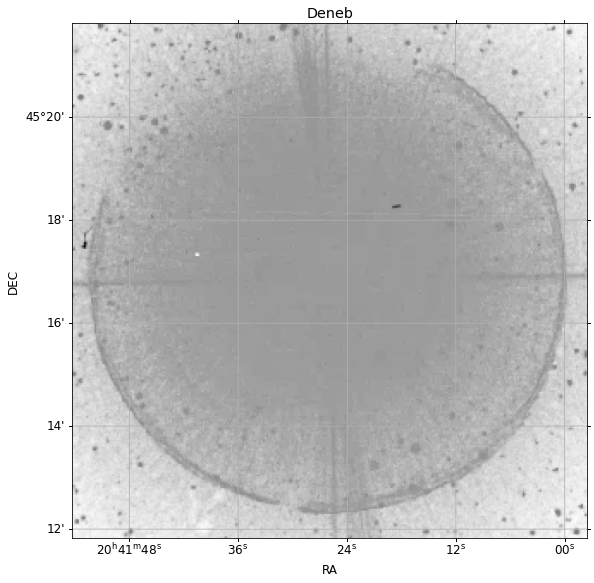

In [ ]:

ax, hdu = plot_finder_image(altair)
plt.tight_layout()
plt.show()

ax, hdu = plot_finder_image(vega)
plt.tight_layout()
plt.show()

ax, hdu = plot_finder_image(deneb)
plt.tight_layout()
plt.show()

Input date (YYYY-MM-DD H:M:S): 2017-04-21 02:51:06


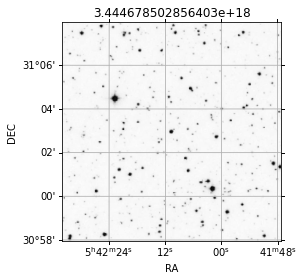

In [ ]:
!pip install astroplan

import pandas as pd
import datetime
import random
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from astroplan import FixedTarget
from astroplan.plots import plot_finder_image

amon_star_database = pd.read_csv('/content/amon_star_database.csv', usecols=['date', 'counts', 'magnitude', 'star_id', 'ra', 'dec'])
amon_star_database["date"] = pd.to_datetime(amon_star_database['date'])
amon_star_database

# 2017-04-21 02:51:06
def validate(date_text):
  try:
      datetime.datetime.strptime(date_text, '%Y-%m-%d %H:%M:%S')
  except ValueError:
      raise ValueError("Incorrect data format, should be 'YYYY-MM-DD H:M:S'")


def visualize_star(date):
  if len(amon_star_database[amon_star_database['date'] == date]) == 0:
    print("Datetime not found in database!")
    return

  star = amon_star_database[amon_star_database['date'] == date].iloc[0] 

  star_coord = SkyCoord(ra=star.ra, dec=star.dec, unit=(u.degree, u.degree), frame='icrs')
  target = FixedTarget(name=star.star_id, coord=star_coord)

  ax, hdu = plot_finder_image(target)
  plt.tight_layout()
  plt.show()

date = input("Input date (YYYY-MM-DD H:M:S): ")
validate(date)
visualize_star(date)

# Nová sekcia